In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

### Объект Series

Series - одномерный похожий на массив объект, содержащий массив данных (любого типа, поддерживаемого NumPy) и ассоциированный с ним массив меток, который называется индексо.м. Простейший объект Series состоит только из мас­ сива данных

In [2]:
obj = Series([12,3,4,-2])

In [3]:
obj

0    12
1     3
2     4
3    -2
dtype: int64

В строковом представлении Series, отображаемом в интерактивном режиме, ин­ декс находится слева, а значения справа. Поскольку мы не задали индекс для дан­ ных, то по умолчанию создается индекс, состоящий из целых чисел от О до N - 1 (где N - длина массива данных). Имея объект Series, получить представление са­ мого массива и его индекса можно с помощью атрибутов values и index соответ­ ственно:

In [4]:
obj.values

array([12,  3,  4, -2])

In [5]:
obj.index

RangeIndex(start=0, stop=4, step=1)

Часто желательно создать объект Series с индексом, идентифицирующим каж­ дый элемент данных:

In [6]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])

In [7]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [8]:
obj2.index

Index(['d', 'b', 'a', 'c'], dtype='object')

В отличие от обычного массива NumPy, для выборки одного или нескольких элементов из объекта Series можно использовать значения индекса:

In [9]:
obj2['a']

-5

In [10]:
obj2[['d','b','c']]

d    4
b    7
c    3
dtype: int64

Операции с массивом NuшPy, например фильтрация с помощью булева масси­ ва, скалярное умножение или применение математических функций, сохраняют связь между индексом и значением:

In [11]:
obj2

d    4
b    7
a   -5
c    3
dtype: int64

In [12]:
obj2[obj2>0]

d    4
b    7
c    3
dtype: int64

In [13]:
obj2 * 2

d     8
b    14
a   -10
c     6
dtype: int64

In [14]:
np.exp(obj2)

d      54.598150
b    1096.633158
a       0.006738
c      20.085537
dtype: float64

Объект Series можно также представлять себе как упорядоченный словарь фик­ сированной длины, поскольку он отображает индекс на данные. Его можно пере­ давать многим функциям, ожидающим получить словарь:


In [15]:
'b' in obj2

True

In [16]:
'f' in obj2

False

Если имеется словарь Python, содержащий данные, то из него можно создать
объект Series:

In [17]:
sdata = {'Ohio' : 35000,
        'Texas' : 71000,
        'Oregon' : 16000,
        'Utah' : 5000}

In [18]:
obj3 = Series(sdata)

In [19]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

Если передается только словарь, то в получившемся объекте Series ключи будут храниться в индексе по порядку:

In [20]:

states = ['California', 'Ohio', 'Oregon', 'Texas']

In [21]:
obj4 = Series(sdata, index = states)
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

В данном случае 3 значения, найденные в sdata, помещены в соответствующие импозиции,адляметки ·California' никакогозначенияненашлось,поэтомуей соответствует признак NaN (не число), которым в pandas обозначаются отсутству­ ющие значения. Иногда, говоря об отсутствующих данных, я буду употреблять термин �NA�. Для распознавания отсутствующих данных в pandas следует ис­ пользовать функции isnull и notnull:

In [22]:
pd.isnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [23]:
pd.notnull(obj4)

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [24]:
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [25]:
obj3,obj4

(Ohio      35000
 Texas     71000
 Oregon    16000
 Utah       5000
 dtype: int64, California        NaN
 Ohio          35000.0
 Oregon        16000.0
 Texas         71000.0
 dtype: float64)

In [26]:
obj3+obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

у самого объекта Series, и у его индекса имеется атрибут name, тесно связан­ ный с другими частями функциональности pandas:

In [27]:
obj4.name = 'population'

In [28]:
obj4.index.name = 'state'

In [29]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

Индекс объекта Series можно изменить на месте с помощью присваивания:

In [30]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']

In [31]:
obj

Bob      12
Steve     3
Jeff      4
Ryan     -2
dtype: int64

## Объект DataFrame

Объект DataFrame представляет табличную структуру данных, состоящую из упорядоченной коллекции столбцов, причем типы значений (числовой, строко­ вый, булев и т. д.) в разных столбцах могут различаться. В объекте DataFгame хранятся два индекса: по строкам и по столбцам. Можно считать, что это словар1, объектов Series. По сравнению с другими похожими на DataFrame структурами,
которые вам могли встречаться раньше (например, data. frame в языке R), опера­ ции со строками и столбцами в DataFrame в первом приближении симметричны. Внутри объекта данные хранятся в виле одного или нескольких двумерных бло­ ков, а не в виде списка, словаря или еще какой-нибудь коллекции одномерных массивов. Технические детали внутреннего устройства DataFrame выходят за рам­
ки этой книги

Есть много способов сконструировать объект DataFrame, один из самых рас­ пространенных - па основе словаря списков одинаковой длины или массивов NumPy:

In [32]:
# DataFrames
data = {'state' : ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
       'year' : [2000, 2001, 2002, 2001, 2002],
       'pop' : [1.5, 1.7, 3.6, 2.4, 2.9]}

In [33]:
df = DataFrame(data)

In [34]:
df

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


Если задать последовательность столбцов, то столбцы DataFrame расположат­ ся строго в указанном порядке:

In [35]:
DataFrame(df, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


Как и в случае Series, если запросить столбец, которого нет в data, то он будет заполнен значениями NaN:

In [36]:
df2 = DataFrame(data, columns = ['year', 'state', 'pop', 'debt'], 
                   index = ['one', 'two', 'three', 'four', 'five'])

In [37]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [38]:
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

Столбец DataFrame можно извлечь как объект Series, воспользовавшись нота­ цией словарей, или с помощью атрибута

In [39]:
df2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

Отметим, что возвращенный объект Se1·ies имеет тот же индекс, что и DataFrame, а его атрибут name установлен соответствующим образом.
Строки также можно извлечь по позиции или по имени, для чего есть два мето­ да, один из них - loc с указанием индексного поля (подробнее об этом ниже):

In [40]:
df2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [41]:
df2.iloc[4]

year       2002
state    Nevada
pop         2.9
debt        NaN
Name: five, dtype: object

Столбцы можно модифицировать путем присваивания. Например, пустому столбцу 'debt • можно было бы присвоить скалярное значение или массив зна­ чений:

In [42]:
df2['debt'] = 16.5

In [43]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [44]:
df2['debt'] = np.arange(5)

In [45]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,0
two,2001,Ohio,1.7,1
three,2002,Ohio,3.6,2
four,2001,Nevada,2.4,3
five,2002,Nevada,2.9,4


Когда столбцу присваивается список или массив, длина значения должна со­ впадать с длиной DataFrame. Если же присваивается объект Series, то он будет точно согласован с индексом DataFrame, а в �дыркю> будут вставлены значения NA:

In [46]:

val = Series([-1.2, -1.5, -1.7], index = ['two', 'four', 'five'])

In [47]:
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [48]:
df2['debt'] = val

In [49]:
df2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


Присваивание несуществующему столбцу приводит к созданию нового столб­ ца. Для удаления столбцов служит ключевое слово del, как и в обычном словаре:

In [50]:
df2['eastern'] = df2.state == 'Ohio'

In [51]:
df2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [52]:
del df2['eastern']

In [53]:
df2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

#### Столбец, возвращенный в ответ на запрос к DataFrame по индексу, являет­ ся представлением, а не копией данных. Следовательно, любые модифи­ кации этого объекта Series, найдут отражение в DataFrame. Чтобы скопи­ ровать столбец, нужно вызвать метод сору объекта Series.

Еще одна распространенная форма данных - словарь словарей:

In [54]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

Если передать его конструктору DataFrarne, то ключи внешнего словаря бу­ дут интерпретированы как столбцы, а ключи внутреннего словаря - как индексы строк: 

In [55]:
frame3=DataFrame(pop)

In [56]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


Разумеется, результат можно транспонировать:

In [57]:
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


Ключи внутренних словарей объединяются и сортируются для образования ин­ декса результата. Однако этого не происходит, если индекс задан явно:


In [58]:
DataFrame(pop,columns = ['Nevada', 'Ohio'],index = [2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [59]:
DataFrame(pop,columns = ['Nevada', 'Ohio'])

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


Словари объектов Series интерпретируются очень похоже:

In [60]:
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}

In [61]:
DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [62]:
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


Если у объектов, возвращаемых при обращении к атрибутам index и colurnns объекта DataFraшe, установлен атрибут narne, то он также выводится:

In [63]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [64]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


Как и в случае Series, атрибут values возвращает данные, хранящиеся в DataFraшe, в виде двумерного массива ndaпay:

In [65]:
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

Если у столбцов DataFramc разные типы данных, то dtype массиnа val ues будет nыбран так, чтобы охnатить все столбцы:

In [66]:
df2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7]], dtype=object)

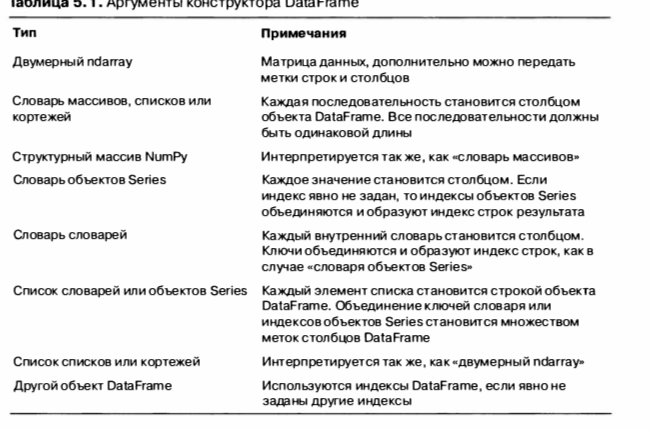

In [67]:
from IPython.display import Image
Image("r.jpg")

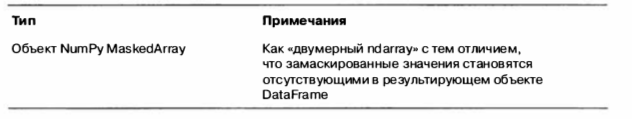

In [68]:
Image("r2.jpg")

# Индексные объекты

В индексных объектах pandas хранятся метки вдоль осей и прочие метаданные (например, имена осей). Любой массив или иная последовательность меток, ука­ занная при конструировании Series или DataFraшe, преобразуется в объект Iнdex:

In [69]:
obj = Series(range(3), index = ['a', 'b', 'c'])
index = obj.index
index

Index(['a', 'b', 'c'], dtype='object')

In [70]:
index[1:]

Index(['b', 'c'], dtype='object')

Индексные объекты неизменяемы, т. е. пользователь не может их модифици­ ровать:

In [71]:
#index[1] = 'd'

Неизменяемость важна для того, чтобы несколько структур данных могли со­ вместно использовать один и тот же индексный объект, не опасаясь его повредить:

In [72]:
index = pd.Index(np.arange(1,4))

In [73]:
index

Int64Index([1, 2, 3], dtype='int64')

In [74]:
obj2 = Series([1.5, -2.5, 0], index=index)

In [75]:
obj2

1    1.5
2   -2.5
3    0.0
dtype: float64

In [76]:
obj2.index is index

True

In [77]:
index2 = [9,8,7]

In [78]:
obj2.index = index2

In [79]:
obj2

9    1.5
8   -2.5
7    0.0
dtype: float64

Индексный объект не только похож на массив, но и ведет себя как множество фиксированного размера:

In [80]:
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [81]:
'Ohio' in frame3.columns

True

In [82]:
2003 in frame3.index

False

# Базовая функциональность

В этом разделе мы рассмотрим фундаментальные основы взаимодействия с дан­ ными, хранящимися в объектах Series и DataFraшe. В последующих главах мы более детально обсудим вопросы анализа и манипуляции данными с применением pandas. Эта книга не задумывалась как исчерпывающая документация по библи­ отеке pandas, я хотел лишь акцентировать внимание на наиболее важных чертах, оставив не столь употребительные (если не сказать эзотерические) вещи для само­ стоятельного изучения читателю.

### Переиндексация

Для объектов pandas критически важен метод reindex, т. е. возможность соз­ дания нового объекта, данные в котором согласуются с новым индексом. Рассмо­ трим простой пример:

In [3]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

obj = Series([9, 7, -5, 3], index = ['d', 'b', 'a', 'c'])
obj

d    9
b    7
a   -5
c    3
dtype: int64

Если вызвать reindex для этого объекта Seгies, то данные будут реорганизова­ ны в соответствии с новым индексом, а если каких-то из имеющихся в этом ин­ дексе значений раньше не было, то вместо них будут подставлены отсутствующие значения:

In [4]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

a   -5.0
b    7.0
c    3.0
d    9.0
e    NaN
dtype: float64

In [5]:
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value = 0)

a   -5
b    7
c    3
d    9
e    0
dtype: int64

Для упорядоченных данных, например временных рядов, иногда желательно произвести интерполяцию, или восполнение отсутствующих значений в процес­ се переиндексации. Это позволяет сделать параметр method; так, если задать для него значение ffill, то будет произведено прямое восполнение значений:

In [6]:
obj3 = Series(['blue', 'purple', 'yellow'], index = [0, 2, 4])
obj3

0      blue
2    purple
4    yellow
dtype: object

In [7]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

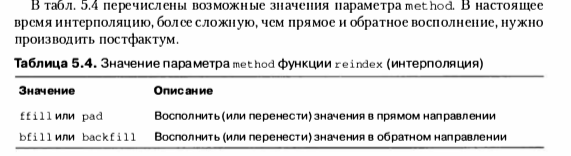

In [9]:
from IPython.display import Image
Image("reindex.jpg")

В случае объекта DataFrame функция reindex может изменять строки, столбцы или то и другое. Если ей передать просто последовательность, то в результирую­ щем объекте переиндексируются строки:

In [25]:
frame = DataFrame(np.arange(9).reshape((3, 3)), 
                  index = ['a', 'c', 'd'],
                 columns = ['Ohio', 'Texas', 'California'])

In [26]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [36]:

frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


Столбцы можно переиндексировать, задав ключевое слово columns:

In [56]:
states = ['Texas', 'Utah', 'California']
frame.reindex(columns = states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


In [57]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [62]:
states = ['Texas','Utah', 'California']
frame3 = frame.reindex(index = ['a', 'b', 'c', 'd','e','f','g'],
             method = 'ffill')

In [64]:
frame3

,Ohio,Texas,California
a,0,1,2
b,0,1,2
c,3,4,5
d,6,7,8
e,6,7,8
f,6,7,8
g,6,7,8


In [65]:
frame3.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
b,1,NaN,2
c,4,NaN,5
d,7,NaN,8
e,7,NaN,8
f,7,NaN,8
g,7,NaN,8
